In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv("C:\Dataset\exams.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [2]:
#drop the 6th,7th,8th columns
data = data.drop(['math score','reading score','writing score'], axis=1)
#change column name race/ethnicity to race
data.rename(columns = {'race/ethnicity':'race'}, inplace = True)
data.rename(columns = {'parental level of education':'parenteducation'}, inplace = True)
data.rename(columns = {'test preparation course':'testpreparation'}, inplace = True)
data = data

data.head(10)


,gender,race,parenteducation,lunch,testpreparation
0,male,group A,high school,standard,completed
1,female,group D,some high school,free/reduced,none
2,male,group E,some college,free/reduced,none
3,male,group B,high school,standard,none
4,male,group E,associate's degree,standard,completed
5,female,group D,high school,standard,none
6,female,group A,bachelor's degree,standard,none
7,male,group E,some college,standard,completed
8,male,group D,high school,standard,none
9,male,group C,some college,free/reduced,none


In [3]:
changegender = {'female':0,'male':1}
changerace = {'group A':0,'group B':1,'group C':2,'group D':3,'group E':4}
changeedu = {'some high school': 0, 'high school': 1, 'some college': 2, 'associate\'s degree': 3, 'bachelor\'s degree': 4, 'master\'s degree': 5}
changelunch = {'free/reduced': 0, 'standard': 1}
changetest = {'none': 0, 'completed': 1}
data.gender = [changegender[item] for item in data.gender]
data.race = [changerace[item] for item in data.race]
data.parenteducation = [changeedu[item] for item in data.parenteducation]
data.lunch = [changelunch[item] for item in data.lunch]
data.testpreparation = [changetest[item] for item in data.testpreparation]

data.head(20)



,gender,race,parenteducation,lunch,testpreparation
0,1,0,1,1,1
1,0,3,0,0,0
2,1,4,2,0,0
3,1,1,1,1,0
4,1,4,3,1,1
5,0,3,1,1,0
6,0,0,4,1,0
7,1,4,2,1,1
8,1,3,1,1,0
9,1,2,2,0,0


c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


i: 1  cost: 4224.652
i: 2  cost: 2617.4958927251614
i: 3  cost: 2085.5066333961477
i: 4  cost: 1720.6914296663695
i: 5  cost: 1476.4504798090159
i: 6  cost: 1355.5122473092895
i: 7  cost: 1229.3345029721504
i: 8  cost: 1132.8951664288948
i: 9  cost: 1092.6556439854432
i: 10  cost: 1052.3483644146431


Text(0.5, 1.0, 'The Elbow Method')

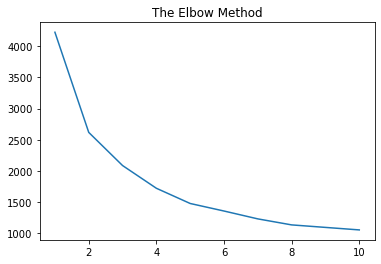

In [4]:
#show elbow graph kmenas
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print ("i:",i, " cost:", kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data)
labels = kmeans.predict(data)
C = kmeans.cluster_centers_
data["cluster"] = kmeans.labels_
data.head(20)

,gender,race,parenteducation,lunch,testpreparation,cluster
0,1,0,1,1,1,1
1,0,3,0,0,0,0
2,1,4,2,0,0,0
3,1,1,1,1,0,1
4,1,4,3,1,1,0
5,0,3,1,1,0,0
6,0,0,4,1,0,2
7,1,4,2,1,1,0
8,1,3,1,1,0,0
9,1,2,2,0,0,1


In [6]:
data.to_csv('hasil_cluster.csv',index=False)